# Week 04. k-Nearest Neighbors Classifier

과제는 총 3개의 cell과 markdown 하나를 채워주셔야합니다

1~3 문제는 영상과 실습자료에 나와있는 것들을 적절히 응용하시면 됩니다

마지막 4번의 경우 본인의 생각을 마크다운으로 작성하는 부분입니다

주석의 경우 이미지, 테이블 등의 표현이 어려운 관계로 받지 않겠습니다

### 실습 00. Load dataset

이번 과제에 사용할 dataset은 붓꽃(iris)입니다

scikit-learn은 간단한 여러 데이터들을 library를 사용하여 불러오도록 제공합니다

불러온 dataset은 다양한 method를 제공합니다

load_iris class를 저장하고 아래 method를 사용하여 아래와 같은 data와 target을 만들어주세요

* 사용가능한 method 



1. load_iris.data

2. load_iris.feature_names

3. load_iris.target

4. load_iris.target_names

주의) 반드시 method 4개를 사용해야합니다

target_names는 setosa, versicolor, virginica가 있습니다

target을 불러오면 0,1,2이기 때문에 각 값을 대치시켜야합니다

![](https://i.imgur.com/RYcsvh2.png)
![](https://i.imgur.com/36KLoiI.png)


In [53]:
import pandas as pd
import numpy as np
import os 

from sklearn.datasets import load_iris

''' 변수 = load_iris()로 object를 생성합니다 '''

' 변수 = load_iris()로 object를 생성합니다 '

In [54]:
load_iris = load_iris()

In [73]:
data=load_iris.data
columns=load_iris.feature_names

In [55]:
df=pd.DataFrame(data=load_iris.data, columns=load_iris.feature_names)
df['target'] = load_iris.target

df['target'] = df['target'].map({0:load_iris.target_names[0], 
                                 1:load_iris.target_names[1], 
                                 2:load_iris.target_names[2]})

In [79]:
data.shape

(150, 4)

In [77]:
df['target'].shape

(150,)

In [56]:
df.shape

(150, 5)

In [57]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 실습 01. Pandas & numpy 사용하기

데이터들을 불러오고 형태를 확인해주세요

DataFrame.shape으로 확인할 수 있습니다

이후, **클래스별** 변수의 갯수와 변수 별 평균, 표준편차를 출력해주세요

출력 양식은 자유롭게 작성하시되, 반드시 위의 요구사항을 만족하여야합니다

In [109]:
target = df['target']
len(target)

150

In [245]:
# 변수의개수
c_setosa = 0
c_versicolor = 0
c_virginica = 0

for i in range(len(target)):
    if target[i]=='setosa':
        c_setosa += 1
    elif target[i]=='versicolor':
        c_versicolor += 1
    else:
        c_virginica += 1

print(c_setosa, c_versicolor, c_virginica)

50 50 50


In [246]:
#  # 변수별 평균
arr_setosa = []
arr_versicolor = []
arr_virginica = []

for i in range(len(target)):
    if target[i]=='setosa':
        arr_setosa.append(data[i])
    elif target[i]=='versicolor':
        arr_versicolor.append(data[i])
    else:
        arr_virginica.append(data[i])
        
_setosa = [0,0,0]
_versicolor = [0,0,0]
_virginica = [0,0,0]

for j in range(len(avg_setosa)):
    for k in range(len(_setosa)):
        _setosa[k]+=avg_setosa[j][k]
        _versicolor[k]+=avg_versicolor[j][k]
        _virginica[k]+=avg_virginica[j][k]  

for l in range(len(_setosa)):
    _setosa[l] = _setosa[l]/50
    _versicolor[l] = _versicolor[l]/50
    _virginica[l] = _virginica[l]/50
    
print(_virginica)
print(_versicolor)
print(_virginica)

[6.587999999999998, 2.9739999999999998, 5.552]
[5.936, 2.7700000000000005, 4.26]
[6.587999999999998, 2.9739999999999998, 5.552]


In [247]:
# 변수별 표준편차

var_setosa = []
var_versicolor = []
var_virginica = []

for i in range(len(target)):
    if target[i]=='setosa':
        var_setosa.append(data[i])
    elif target[i]=='versicolor':
        var_versicolor.append(data[i])
    else:
        var_virginica.append(data[i])
        
temp1 = []
temp2 = []
temp3 = []

for j in range(0,50):
    temp1.append(var_setosa[j][0])
    temp2.append(var_setosa[j][1])
    temp3.append(var_setosa[j][2])    
_setosa = [np.var(temp1),np.var(temp2),np.var(temp3)]  

temp1 = []
temp2 = []
temp3 = []

for j in range(0,50):
    temp1.append(var_versicolor[j][0])
    temp2.append(var_versicolor[j][1])
    temp3.append(var_versicolor[j][2])    
_versicolor = [np.var(temp1),np.var(temp2),np.var(temp3)]  

temp1 = []
temp2 = []
temp3 = []

for j in range(0,50):
    temp1.append(var_virginica[j][0])
    temp2.append(var_virginica[j][1])
    temp3.append(var_virginica[j][2])    
_virginica = [np.var(temp1),np.var(temp2),np.var(temp3)]  

print(_setosa)
print(_versicolor)
print(_virginica)


[0.12176400000000002, 0.14081600000000002, 0.029555999999999995]
[0.261104, 0.09650000000000002, 0.21640000000000004]
[0.3962560000000001, 0.10192399999999999, 0.29849600000000004]


### 실습 02. Train - test set split

실습수업 마지막에 소개한 dataset분리를 시도합니다

학습용 dataset과 검증용 dataset을 나눠보겠습니다

train_test_split은 data를 간편하게 나눌수 있도록 도와줍니다

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data,df['target'],test_size=0.2,shuffle=True,)

In [81]:
X_train

array([[6. , 2.7, 5.1, 1.6],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.9, 5.6, 1.8],
       [4.4, 2.9, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.2, 3.4, 1.4, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [4.3, 3. , 1.1, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.4, 3.4, 1.7, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3. , 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.9, 3.2, 4.8, 1.8],
       [7. , 3.2, 4.7, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [4.6, 3.2, 1.4, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.5, 2.6, 4.4, 1.2],
       [4.9, 2.4, 3.3, 1. ],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.5, 5. , 2. ],
       [6.7, 3.1, 5.6, 2.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2

In [82]:
X_test

array([[6. , 3. , 4.8, 1.8],
       [5.7, 4.4, 1.5, 0.4],
       [5.1, 2.5, 3. , 1.1],
       [6.8, 3.2, 5.9, 2.3],
       [5.7, 2.6, 3.5, 1. ],
       [5. , 3.5, 1.3, 0.3],
       [6.1, 3. , 4.9, 1.8],
       [7.1, 3. , 5.9, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [4.5, 2.3, 1.3, 0.3],
       [6.4, 3.2, 4.5, 1.5],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5.6, 3. , 4.5, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [5.6, 3. , 4.1, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.3, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 2.8, 5.6, 2.1],
       [6.7, 3.3, 5.7, 2.5],
       [7.7, 2.8, 6.7, 2. ],
       [7.7, 2.6, 6.9, 2.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.4, 2.8, 6.1, 1.9],
       [4.8, 3. , 1.4, 0.1],
       [5.1, 3.4, 1.5, 0.2]])

In [83]:
y_train

83     versicolor
11         setosa
49         setosa
115     virginica
117     virginica
          ...    
43         setosa
38         setosa
104     virginica
16         setosa
112     virginica
Name: target, Length: 120, dtype: object

In [84]:
y_test

138     virginica
15         setosa
98     versicolor
143     virginica
79     versicolor
40         setosa
127     virginica
102     virginica
2          setosa
63     versicolor
41         setosa
51     versicolor
7          setosa
146     virginica
66     versicolor
56     versicolor
88     versicolor
75     versicolor
80     versicolor
53     versicolor
134     virginica
121     virginica
128     virginica
144     virginica
122     virginica
118     virginica
5          setosa
130     virginica
12         setosa
39         setosa
Name: target, dtype: object

### 실습 03. k-Nearest Neighbors Classifier

Scikit learn으로부터 kNN Classifier를 불러오겠습니다

In [96]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

나뉜 데이터셋을 분류하기 위한 적절한 이웃의 갯수 $k$를 찾아보려합니다

반복문을 사용하여 이웃의 갯수을 변화시켜가며 분류하고, 각 class별 정확도를 선형으로 시각화해주세요

아래는 예시 그림입니다

![](https://i.imgur.com/zZOKD42.png)

In [98]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
# train set의 정확도
classifier.score(X_train, y_train)

0.9583333333333334

In [229]:
train_acc = []
test_acc = []

for n in range(1,15):
    classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    train_acc.append(classifier.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())

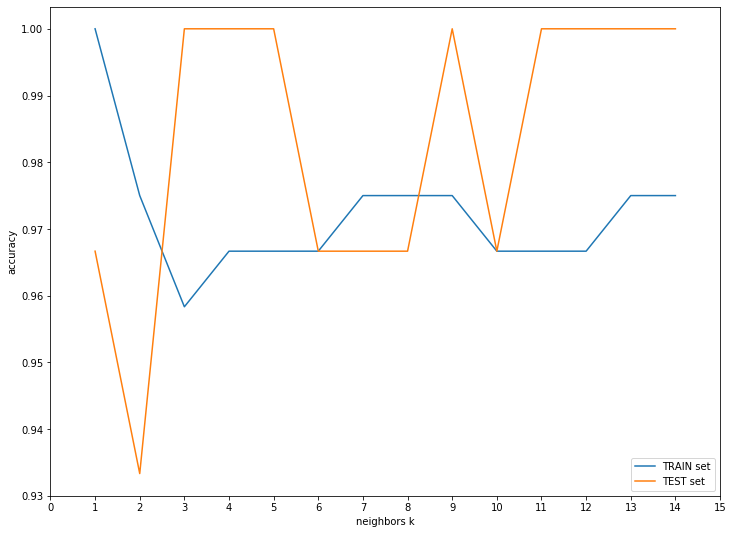

In [230]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("neighbors k")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

이번에는 data의 변수들을 scaling해보고 거리기반으로 분류한 뒤 위와 같은 형태로 시각화해주세요

그리고 각 결과에 대한 본인의 생각을 마크다운으로 자유롭게 작성해주시면 됩니다

k의 값이 작을때는 결정 경계가 매우 복잡해지고, 
k의 값이 커지게 되면 결정 단계가 단순해지는 것을 확인할 수 있다.